In [288]:
import yelpapi
import json
import requests
from  pprint import  pprint
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

counties=pd.read_csv("acs2015_county_data.csv")
counties["county_string"] = counties["County"] + " County, " + counties["State"]
listofcounties = counties["county_string"].tolist()
zipcodes=pd.read_csv("zip_codes_states.csv")
zipcodes["county_string"] = zipcodes["county"] + " County, " + zipcodes["state"]
listofzipcodes=zipcodes["county_string"].unique().tolist()
counties.to_csv("counties.csv")
zipcodes.to_csv("zcs.csv")
counties.head()

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,county_string
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,"Autauga County, Alabama"
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,"Baldwin County, Alabama"
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,"Barbour County, Alabama"
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,"Bibb County, Alabama"
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,"Blount County, Alabama"


In [102]:
#comparing to other similar sized counties in the Southeast
#Charlotte, Raleigh, Atlanta, Memphis, Orlando
#comparing to other similar sized counties in other parts of the US
#Milwaukee, San Francisco, Austin, Pittsburgh

countieslist = ["Mecklenburg County, North Carolina",
                "Wake County, North Carolina", "Fulton County, Georgia", "Shelby County, Tennessee", "Orange County, Florida",
                "Milwaukee County, Wisconsin", "San Francisco County, California", "Travis County, Texas", "Allegheny County, Pennsylvania"]
countiescompare = counties[counties["county_string"].isin(countieslist)]
countiescompare
sample_list = countiescompare["county_string"].tolist()
sample_list

['San Francisco County, California',
 'Orange County, Florida',
 'Fulton County, Georgia',
 'Mecklenburg County, North Carolina',
 'Wake County, North Carolina',
 'Allegheny County, Pennsylvania',
 'Shelby County, Tennessee',
 'Travis County, Texas',
 'Milwaukee County, Wisconsin']

In [103]:
res_df = pd.DataFrame(columns=["name","zipcode","county_string","rating","review_count","category"])
res_df

,name,zipcode,county_string,rating,review_count,category


In [104]:
r = 0
for c in sample_list:
    county_string = str(c)
    for term in ["Italian","Mexican","Chinese","American (Traditional)","American (New)","Indian"]:
        #we are allowed 5000 queries per 24 hours. if we run out, we can create another. till then, use this
        yelpkey="IXRN_1GI8f8J9Kj5O5GciqeyFSWR5RMh41_rADGy1KrtQ5ZABGGZEkWwot5mOka0NlzlNxXPmzYXLWk88oOV0N_YxD1MSW4kQRfJnFrwfHLtKrr2HcsjLo6uWBzAWnYx"
        try:
            offset=0
            for loopcount in range(25):
                
                response = requests.get(url="https://api.yelp.com/v3/businesses/search", 
                       params= {"location": county_string,"term": term, "limit":"50", "offset": offset}, 
                       headers={'Authorization': 'bearer %s' % yelpkey})
                responsejson = response.json()
                offset += 50
                try:
                    count=0
            
                    for x in range(0,49):
                        for y in range(0,len(responsejson["businesses"][x]["categories"])):
                            if ((responsejson["businesses"][x]["categories"][y]["title"]==term) and 
                                (responsejson["businesses"][x]["review_count"] > 0)):
                        
                                zc = int(responsejson["businesses"][x]["location"]["zip_code"])
                                if (zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0]== county_string):
                            
                                    print("\n",responsejson["businesses"][x]["name"],
                                          responsejson["businesses"][x]["location"]["zip_code"],
                                          zipcodes.loc[zipcodes["zip_code"]==zc]["county_string"].tolist()[0],
                                          responsejson["businesses"][x]["rating"],
                                          responsejson["businesses"][x]["review_count"],
                                          responsejson["businesses"][x]["categories"][y]["title"])
                            
                                    res_df.loc[r]=[responsejson["businesses"][x]["name"],
                                          zc,
                                          county_string,
                                          responsejson["businesses"][x]["rating"],
                                          responsejson["businesses"][x]["review_count"],
                                          term]
                                    count += 1
                                    r += 1
                except:
                    break
    
                print("End of list. Found", count, term, "restaurants in", county_string)
        except:
            break



 Sotto Mare Oysteria & Seafood 94133 San Francisco County, California 4.5 2998 Italian

 Bella Trattoria 94118 San Francisco County, California 4.0 1175 Italian

 The Italian Homemade Company 94123 San Francisco County, California 4.5 598 Italian

 È Tutto Qua 94133 San Francisco County, California 4.0 1840 Italian

 Beretta 94110 San Francisco County, California 4.0 3218 Italian

 Delfina 94110 San Francisco County, California 4.0 1902 Italian

 Italian Homemade Company 94133 San Francisco County, California 4.5 963 Italian

 Trattoria Contadina 94133 San Francisco County, California 4.0 1150 Italian

 Seven Hills 94109 San Francisco County, California 4.5 851 Italian

 Roma Antica 94123 San Francisco County, California 4.5 148 Italian

 Fino Ristorante & Bar 94109 San Francisco County, California 4.0 992 Italian

 Barbacco 94111 San Francisco County, California 4.0 1463 Italian

 La Traviata 94110 San Francisco County, California 4.0 525 Italian

 a Mano 94102 San Francisco County, 


 Pasquale's Pizza 94122 San Francisco County, California 3.5 828 Italian

 Uncle Vito's Pizza 94108 San Francisco County, California 4.0 1046 Italian

 Contrada 94123 San Francisco County, California 3.5 51 Italian

 Little Henry's 94121 San Francisco County, California 3.0 240 Italian

 Colombini Italian Cafe Bistro 94109 San Francisco County, California 3.5 146 Italian

 Pescatore 94133 San Francisco County, California 3.5 308 Italian

 Giorgio's Pizzeria 94118 San Francisco County, California 4.0 903 Italian

 Quince 94133 San Francisco County, California 4.0 1326 Italian

 The Sausage Factory 94114 San Francisco County, California 3.5 502 Italian

 Capurro's 94109 San Francisco County, California 3.5 669 Italian

 Piazza Pellegrini 94133 San Francisco County, California 3.5 566 Italian

 Trattoria Pinocchio 94133 San Francisco County, California 3.5 725 Italian

 Victor's Pizzeria & Italian Restaurant 94109 San Francisco County, California 4.0 842 Italian

 The Meatball Bar 94104 


 El Castillito 94114 San Francisco County, California 4.0 774 Mexican

 El Buen Comer 94110 San Francisco County, California 4.0 208 Mexican

 Cilantro SF Taqueria 94133 San Francisco County, California 4.5 42 Mexican

 Papito Potrero Hill 94107 San Francisco County, California 4.0 601 Mexican

 Cochinita 94109 San Francisco County, California 4.5 7 Mexican

 Mateo's Taqueria 94110 San Francisco County, California 4.0 353 Mexican

 Taqueria El Farolito 94133 San Francisco County, California 4.0 69 Mexican

 Velvet Cantina 94110 San Francisco County, California 4.0 1146 Mexican

 Flores  94123 San Francisco County, California 4.0 267 Mexican

 El Rincón Yucateco 94102 San Francisco County, California 4.5 114 Mexican

 El Metate Restaurant 94110 San Francisco County, California 4.0 1033 Mexican

 Gallardos Mexican Restaurant 94110 San Francisco County, California 4.0 361 Mexican

 El Burrito Express 94115 San Francisco County, California 4.0 634 Mexican

 Mexico Tipico 94112 San Francis


 Pasilla Mexican Grill 94108 San Francisco County, California 3.5 237 Mexican

 The City Taqueria 94115 San Francisco County, California 3.5 281 Mexican
End of list. Found 46 Mexican restaurants in San Francisco County, California

 Taqueria Zorro 94133 San Francisco County, California 3.5 365 Mexican

 Altena Restaurant 94110 San Francisco County, California 3.5 60 Mexican

 Taqueria Cancún 94110 San Francisco County, California 4.0 1928 Mexican

 Tacolicious 94133 San Francisco County, California 3.5 402 Mexican

 El Buen Comer 94114 San Francisco County, California 5.0 18 Mexican

 El Tepa Taqueria 94110 San Francisco County, California 4.0 118 Mexican

 Taqueria San Francisco 94110 San Francisco County, California 4.0 220 Mexican

 Taqueria Dos Amigos 94103 San Francisco County, California 3.5 170 Mexican

 Taqueria Castillo B 94102 San Francisco County, California 3.5 139 Mexican

 Burrito Loco 94127 San Francisco County, California 3.0 101 Mexican

 Roosevelt Tamale Parlor 94110


 Henry's Hunan Restaurant 94131 San Francisco County, California 4.0 351 Chinese

 Terra Cotta Warrior 94122 San Francisco County, California 3.5 391 Chinese

 Hong Kong Clay Pot Restaurant 94108 San Francisco County, California 3.5 715 Chinese

 Hai Ky Noodles 94109 San Francisco County, California 4.0 802 Chinese

 The Chairman 94109 San Francisco County, California 4.5 508 Chinese

 New Ming's Restaurant 94105 San Francisco County, California 3.5 337 Chinese

 Red Jade 94114 San Francisco County, California 3.5 677 Chinese

 J & A Restaurant 94112 San Francisco County, California 4.0 117 Chinese

 Big Lantern 94103 San Francisco County, California 3.5 793 Chinese

 Ling Ling Cuisine Restaurant 94134 San Francisco County, California 3.5 135 Chinese

 Mission Hunan Restaurant 94103 San Francisco County, California 3.5 97 Chinese

 San Wang Restaurant 94115 San Francisco County, California 3.5 388 Chinese

 New Lun Ting Cafe 94133 San Francisco County, California 4.0 272 Chinese

 Hen


 AA Bakery & Cafe 94108 San Francisco County, California 4.0 336 Chinese

 Little Beijing Restaurant 94122 San Francisco County, California 3.5 182 Chinese

 Boiling Hot Pot 94121 San Francisco County, California 4.5 514 Chinese

 Shangri-La Vegetarian Restaurant 94122 San Francisco County, California 4.0 394 Chinese

 Bamboo Restaurant 94109 San Francisco County, California 3.0 398 Chinese

 New Hollywood Bakery & Restaurant 94133 San Francisco County, California 4.0 71 Chinese

 Hunan Chef 94110 San Francisco County, California 3.0 78 Chinese

 Tasty Restaurant 94121 San Francisco County, California 3.0 70 Chinese

 Ben Wah 94115 San Francisco County, California 3.0 80 Chinese

 Hunan House 94108 San Francisco County, California 3.5 155 Chinese

 Asia Chinese Food 94133 San Francisco County, California 3.5 34 Chinese

 Fang Yuan Kitchen 94132 San Francisco County, California 2.5 39 Chinese

 Oriental Seafood Restaurant 94122 San Francisco County, California 3.0 141 Chinese

 IPOT 94


 Hopwater Distribution 94108 San Francisco County, California 4.5 612 American (Traditional)

 Marengo On the Alley 94111 San Francisco County, California 4.0 103 American (Traditional)

 White Horse Tavern & Restaurant 94102 San Francisco County, California 4.0 248 American (Traditional)

 Lafayette Coffee Shop 94109 San Francisco County, California 4.0 31 American (Traditional)

 Dottie's True Blue Cafe 94103 San Francisco County, California 4.0 3847 American (Traditional)

 BIX 94133 San Francisco County, California 4.0 1650 American (Traditional)

 Delancey Street Restaurant 94107 San Francisco County, California 4.0 1425 American (Traditional)

 Hops & Hominy 94108 San Francisco County, California 4.0 1764 American (Traditional)

 High Treason 94118 San Francisco County, California 4.5 106 American (Traditional)

 The Richfield 94118 San Francisco County, California 4.5 131 American (Traditional)

 Art's Cafe 94122 San Francisco County, California 4.0 1010 American (Traditional)



 The Board 94103 San Francisco County, California 4.0 25 American (Traditional)

 Sausage Pop Up 94110 San Francisco County, California 4.0 1 American (Traditional)

 Wok-In Cafeteria 94124 San Francisco County, California 4.0 41 American (Traditional)

 Buckhorn Grill 94103 San Francisco County, California 3.5 8 American (Traditional)
End of list. Found 44 American (Traditional) restaurants in San Francisco County, California

 St Francis Fountain 94110 San Francisco County, California 4.0 1110 American (Traditional)

 3rd Street Grill 94107 San Francisco County, California 3.5 136 American (Traditional)

 Eats 94118 San Francisco County, California 4.0 926 American (Traditional)

 Mocha's Cafe & Grill 94102 San Francisco County, California 3.5 33 American (Traditional)

 The Pin Up All-Star Diner 94107 San Francisco County, California 3.5 35 American (Traditional)

 MunchBoxx 94111 San Francisco County, California 4.0 268 American (Traditional)

 Coin-Op Game Room 94107 San Francisc


 Viva Goa 94123 San Francisco County, California 4.0 382 Indian

 Chullo Nepali Indian Cuisine 94107 San Francisco County, California 4.0 23 Indian

 Naan N Curry 94114 San Francisco County, California 4.5 31 Indian

 The Dosa Brothers 94104 San Francisco County, California 4.5 252 Indian

 Indian Palace 94110 San Francisco County, California 3.5 38 Indian

 India Clay Oven 94121 San Francisco County, California 3.5 618 Indian

 Urban Curry Restaurant 94133 San Francisco County, California 4.0 587 Indian

 India Clay Oven 94127 San Francisco County, California 3.5 448 Indian

 Chennai Kings 94133 San Francisco County, California 3.5 119 Indian

 Curry Up Now 94110 San Francisco County, California 3.5 516 Indian

 Chaat Corner 94102 San Francisco County, California 3.5 197 Indian

 Red Chilli 94102 San Francisco County, California 4.0 359 Indian

 Naan N Curry 94107 San Francisco County, California 4.0 41 Indian
End of list. Found 49 Indian restaurants in San Francisco County, Californ


 Brio Tuscan Grille 32839 Orange County, Florida 3.5 210 Italian

 Victorio's Restaurant 32703 Orange County, Florida 4.0 49 Italian

 Italian Village Pizza 32825 Orange County, Florida 3.5 50 Italian

 Bella Tuscany Ristorante Italiano 34786 Orange County, Florida 3.5 164 Italian

 Pasquale's 32829 Orange County, Florida 3.0 53 Italian

 Ferrara's Pizza and Pasta 32825 Orange County, Florida 3.0 68 Italian

 Via Napoli 32830 Orange County, Florida 4.0 601 Italian

 BRAVO! Cucina Italiana 32819 Orange County, Florida 3.5 150 Italian

 Fiorenzo Italian Steakhouse 32819 Orange County, Florida 4.0 60 Italian

 Ragazzi's Pizza & Restaurant 32804 Orange County, Florida 3.5 77 Italian

 Alexander's Ristorante 32822 Orange County, Florida 3.0 48 Italian

 Anthony's Pizza Thornton Park 32801 Orange County, Florida 3.5 158 Italian

 Olive Garden Italian Restaurant 32789 Orange County, Florida 4.0 74 Italian

 Pizzeria Valdiano 32789 Orange County, Florida 4.0 124 Italian

 Buca di Beppo Italia


 El Tenampa 32837 Orange County, Florida 4.5 163 Mexican

 Taqueria Ameca 32806 Orange County, Florida 4.5 112 Mexican

 Chuy's 32822 Orange County, Florida 3.5 260 Mexican

 Las Cazuelas 32812 Orange County, Florida 4.5 31 Mexican

 Chuy's 32819 Orange County, Florida 4.0 490 Mexican

 Tako Cheena 32803 Orange County, Florida 4.5 1239 Mexican

 Garibaldi Mexican Restaurant 32807 Orange County, Florida 3.5 219 Mexican

 Tacos El Rancho 32812 Orange County, Florida 4.0 111 Mexican

 Tacos Express Florida 32837 Orange County, Florida 4.5 179 Mexican

 JJ's Fusion Grille 32806 Orange County, Florida 4.5 262 Mexican

 Taco Norteño 34787 Orange County, Florida 4.5 162 Mexican

 Tacos El Rancho 32825 Orange County, Florida 4.0 66 Mexican

 Gringos Locos 32801 Orange County, Florida 4.0 719 Mexican

 Azteca D' Oro 32818 Orange County, Florida 4.0 117 Mexican
End of list. Found 34 Mexican restaurants in Orange County, Florida

 Habaneros Mexican 32792 Orange County, Florida 3.5 79 Mexican

 P


 China King 32837 Orange County, Florida 4.0 26 Chinese

 Sino 1 Chinese & Sushi 32822 Orange County, Florida 3.5 31 Chinese

 Zhang Garden Chinese Restaurant 32827 Orange County, Florida 3.0 23 Chinese

 La China 32829 Orange County, Florida 3.5 26 Chinese

 Empire Szechuan 32801 Orange County, Florida 3.0 50 Chinese

 China Wok 32712 Orange County, Florida 3.5 16 Chinese

 Pei Wei 32817 Orange County, Florida 3.5 75 Chinese

 Asian Express 32819 Orange County, Florida 4.5 15 Chinese
End of list. Found 26 Chinese restaurants in Orange County, Florida

 China City 32828 Orange County, Florida 2.5 13 Chinese

 888 Chinese Restaurant 32825 Orange County, Florida 3.0 26 Chinese

 Lai Lai Chinese Cuisine & Sushi Bar 32809 Orange County, Florida 4.0 51 Chinese

 New Shanghai Chinese 32826 Orange County, Florida 3.5 15 Chinese

 Tao Garden 32792 Orange County, Florida 3.5 14 Chinese

 Asia Kitchen 32792 Orange County, Florida 3.5 44 Chinese

 Wok & Roll 32828 Orange County, Florida 2.5 16 C


 Boca Kitchen Bar Market 32789 Orange County, Florida 4.0 385 American (New)

 Luma on Park 32789 Orange County, Florida 4.0 401 American (New)

 Slate Restaurant 32819 Orange County, Florida 4.0 271 American (New)

 RusTeak Restaurant & Wine Bar 34761 Orange County, Florida 4.0 231 American (New)

 Marlow's Tavern 32819 Orange County, Florida 4.0 420 American (New)

 Hamilton's Kitchen 32789 Orange County, Florida 4.0 160 American (New)

 Se7en Bites 32803 Orange County, Florida 4.5 1219 American (New)

 Earls Kitchen + Bar 32839 Orange County, Florida 4.0 323 American (New)

 The Rustic Table Restaurant 32789 Orange County, Florida 3.0 11 American (New)

 The Neighborhood Eatery 32801 Orange County, Florida 4.5 66 American (New)

 Whisper Creek Farm: The Kitchen 32837 Orange County, Florida 4.5 50 American (New)

 Marlow's Tavern 32822 Orange County, Florida 4.0 211 American (New)

 Canvas 32827 Orange County, Florida 4.0 238 American (New)

 The Tasting Room 34787 Orange County, Fl


 Moon Cricket Grille 34787 Orange County, Florida 3.5 148 American (New)

 Urban Flats 34787 Orange County, Florida 3.5 134 American (New)

 Dexter's Windermere 34786 Orange County, Florida 3.5 149 American (New)

 Currito 32821 Orange County, Florida 4.5 3 American (New)

 Chili's 32816 Orange County, Florida 3.5 3 American (New)

 Eastside Bistro 32828 Orange County, Florida 3.0 81 American (New)

 Seasons 52 32819 Orange County, Florida 4.0 597 American (New)

 Smokey Bones Bar & Fire Grill 32803 Orange County, Florida 3.0 140 American (New)

 Florida Tap Room 32835 Orange County, Florida 3.5 9 American (New)

 Chew Lab 32836 Orange County, Florida 5.0 1 American (New)
End of list. Found 25 American (New) restaurants in Orange County, Florida

 The Cheesecake Factory 32839 Orange County, Florida 3.5 383 American (New)

 Tamarind Indian Cuisine 32789 Orange County, Florida 4.0 349 Indian

 Tamarind Indian Cuisine 32826 Orange County, Florida 4.5 267 Indian

 Moghul Indian Cuisine 32


 Moctezuma Mexican Grill 30004 Fulton County, Georgia 4.5 171 Mexican

 El Bandido Mex Mex Grill 30307 Fulton County, Georgia 4.0 173 Mexican

 La Hacienda 30308 Fulton County, Georgia 3.5 221 Mexican

 The Original El Taco 30306 Fulton County, Georgia 4.0 367 Mexican

 Tacos & Tequilas Mexican Grill 30308 Fulton County, Georgia 4.0 319 Mexican

 Carnicería Los Pinos 30328 Fulton County, Georgia 4.5 47 Mexican

 bartaco 30318 Fulton County, Georgia 4.0 928 Mexican

 Taqueria Cuernavaca 30342 Fulton County, Georgia 4.0 21 Mexican
End of list. Found 26 Mexican restaurants in Fulton County, Georgia

 Blue Coast Burrito 30318 Fulton County, Georgia 4.5 48 Mexican

 El Trompo Mexican Taqueria 30005 Fulton County, Georgia 4.5 295 Mexican

 Verde Taqueria 30318 Fulton County, Georgia 4.0 175 Mexican

 Senor Patron 30308 Fulton County, Georgia 4.0 286 Mexican

 Cinco Mexican Cantina 30339 Fulton County, Georgia 3.0 339 Mexican

 La Parrilla Mexican Restaurant 30318 Fulton County, Georgia 3.5 


 Yumbii 30309 Fulton County, Georgia 4.0 204 Mexican

 Mr Taco 30022 Fulton County, Georgia 3.5 134 Mexican

 chicomecóATL 30309 Fulton County, Georgia 5.0 1 Mexican

 El Nopal Mexican Restaurant 30349 Fulton County, Georgia 3.0 21 Mexican

 Barberitos 30342 Fulton County, Georgia 3.5 41 Mexican

 Prickly Pear Taqueria 30309 Fulton County, Georgia 2.5 227 Mexican

 Bell Street Burritos 30303 Fulton County, Georgia 3.5 52 Mexican

 Willy's Mexicana Grill 30318 Fulton County, Georgia 3.5 71 Mexican

 El Porton Mexican Restaurant 30076 Fulton County, Georgia 3.0 105 Mexican
End of list. Found 9 Mexican restaurants in Fulton County, Georgia

 Adobo Taqueria and Tequila Bar 30022 Fulton County, Georgia 3.5 78 Mexican

 Willy's Mexicana Grill 30303 Fulton County, Georgia 3.5 13 Mexican

 Taqueria Taquito Express 30076 Fulton County, Georgia 4.5 4 Mexican

 St Andres 30338 Fulton County, Georgia 2.5 9 Mexican

 Willy's Mexicana Grill 30354 Fulton County, Georgia 3.5 31 Mexican

 La Fiesta Me


 Burger Win 30316 Fulton County, Georgia 4.0 115 Chinese

 Noodle 30337 Fulton County, Georgia 4.0 171 Chinese

 Orient At Vinings 30339 Fulton County, Georgia 3.5 2 Chinese

 Grand China Restaurant 30305 Fulton County, Georgia 3.5 152 Chinese

 Rasa Sayang 30076 Fulton County, Georgia 4.0 169 Chinese

 China Garden 30291 Fulton County, Georgia 4.0 29 Chinese

 Happy Buddha Restaurant 30337 Fulton County, Georgia 3.5 43 Chinese

 Ginseng Cafe 30303 Fulton County, Georgia 4.0 22 Chinese

 China Garden 30076 Fulton County, Georgia 3.5 61 Chinese

 Lee's Golden Buddha Restaurant 30342 Fulton County, Georgia 3.0 74 Chinese

 J's Asian Cafe 30022 Fulton County, Georgia 4.5 93 Chinese

 Chinese Budda 30318 Fulton County, Georgia 3.5 7 Chinese
End of list. Found 12 Chinese restaurants in Fulton County, Georgia

 China Wok 30337 Fulton County, Georgia 4.0 17 Chinese

 Panda Wok 30344 Fulton County, Georgia 3.5 13 Chinese

 China Dragon 30306 Fulton County, Georgia 3.0 73 Chinese

 Lucky China


 Mandarin Express Airport II 30303 Fulton County, Georgia 1.5 13 Chinese
End of list. Found 1 Chinese restaurants in Fulton County, Georgia

 China Chef Cafe 30316 Fulton County, Georgia 5.0 1 Chinese

 Tin Drum Asian Kitchen - Roswell Market Place 30076 Fulton County, Georgia 2.5 105 Chinese
End of list. Found 2 Chinese restaurants in Fulton County, Georgia

 V1 Bbq and Cafe 2 30005 Fulton County, Georgia 4.0 1 Chinese
End of list. Found 1 Chinese restaurants in Fulton County, Georgia

 Asia House 30005 Fulton County, Georgia 2.5 3 Chinese

 China Restaraunt 30004 Fulton County, Georgia 2.5 3 Chinese
End of list. Found 2 Chinese restaurants in Fulton County, Georgia

 Stockyard Burgers & Bones 30339 Fulton County, Georgia 4.0 217 American (Traditional)

 The Hungry Peach 30305 Fulton County, Georgia 4.5 42 American (Traditional)

 Stockyard Burgers & Bones 30328 Fulton County, Georgia 4.5 62 American (Traditional)

 SOHO Restaurant 30339 Fulton County, Georgia 4.0 165 American (Tradi


 Atlanta Breakfast Club 30313 Fulton County, Georgia 4.5 1100 American (Traditional)

 Mom's Table 30075 Fulton County, Georgia 3.0 8 American (Traditional)

 Kwan's Deli and Korean Kitchen 30313 Fulton County, Georgia 4.0 233 American (Traditional)
End of list. Found 21 American (Traditional) restaurants in Fulton County, Georgia

 The Cloakroom Kitchen & Bar 30303 Fulton County, Georgia 5.0 4 American (Traditional)

 Ted's Montana Grill - Midtown 30309 Fulton County, Georgia 3.5 174 American (Traditional)

 Walts Grill 30316 Fulton County, Georgia 4.5 4 American (Traditional)

 ROXX Tavern 30324 Fulton County, Georgia 3.5 150 American (Traditional)

 R. Thomas Deluxe Grill 30309 Fulton County, Georgia 4.0 834 American (Traditional)

 Fred's Meat & Bread 30308 Fulton County, Georgia 3.5 9 American (Traditional)

 Another Broken Egg Cafe 30339 Fulton County, Georgia 4.0 335 American (Traditional)

 Hott Chixx Wings 30311 Fulton County, Georgia 3.5 18 American (Traditional)

 The Flyin


 Urban Foodie Feed Store 30337 Fulton County, Georgia 4.0 222 American (New)

 Cassis 30305 Fulton County, Georgia 4.0 14 American (New)

 Farmer's Basket 30326 Fulton County, Georgia 4.0 30 American (New)

 Urban Cannibals 30308 Fulton County, Georgia 4.0 37 American (New)

 Thrive 30303 Fulton County, Georgia 3.5 237 American (New)

 Vin 25 30075 Fulton County, Georgia 4.5 169 American (New)

 American Cut Steakhouse 30305 Fulton County, Georgia 3.5 100 American (New)

 JJ Fish & Chicken 30315 Fulton County, Georgia 4.0 36 American (New)

 Marlow's Tavern 30342 Fulton County, Georgia 4.0 123 American (New)
End of list. Found 29 American (New) restaurants in Fulton County, Georgia

 Yard House 30339 Fulton County, Georgia 3.0 191 American (New)

 STK Atlanta 30309 Fulton County, Georgia 4.0 666 American (New)

 Stone's Cuisine & Cocktails 30022 Fulton County, Georgia 4.5 81 American (New)

 Souf Side Café of Atlanta 30349 Fulton County, Georgia 3.5 8 American (New)

 Houston's Restau


 Don Pedro Mexican Restaurant 28213 Mecklenburg County, North Carolina 3.5 100 Mexican

 Miguel's Restaurants 28214 Mecklenburg County, North Carolina 4.0 252 Mexican

 El Toro Mexican Grill and Bar 28031 Mecklenburg County, North Carolina 4.5 71 Mexican

 El Valle Mexican Restaurant 28105 Mecklenburg County, North Carolina 4.0 74 Mexican

 Tacos El Nevado 28209 Mecklenburg County, North Carolina 4.0 30 Mexican

 Vida Mexican Kitchen y Cantina 28202 Mecklenburg County, North Carolina 3.5 361 Mexican

 La Fiesta Grande 28214 Mecklenburg County, North Carolina 3.0 64 Mexican

 Los Arcos 28262 Mecklenburg County, North Carolina 3.5 66 Mexican

 La Espiga 28213 Mecklenburg County, North Carolina 5.0 4 Mexican

 Cabo's Mexican Cuisine and Cantina 28226 Mecklenburg County, North Carolina 4.0 118 Mexican

 Tacos El Nevado 28205 Mecklenburg County, North Carolina 4.0 31 Mexican

 Monterrey Mexican Restaurant 28213 Mecklenburg County, North Carolina 3.5 76 Mexican

 Taqueria Mexico 28217 Meckl


 The Turnhouse Grille 28209 Mecklenburg County, North Carolina 4.5 69 American (Traditional)

 Tatsis Restaurant 28206 Mecklenburg County, North Carolina 5.0 3 American (Traditional)

 Metro Diner 28078 Mecklenburg County, North Carolina 4.0 119 American (Traditional)

 The Red House Cafe 28205 Mecklenburg County, North Carolina 4.0 24 American (Traditional)

 Alexander Michael's 28202 Mecklenburg County, North Carolina 4.5 329 American (Traditional)

 Coaltrane's Char Grill 28205 Mecklenburg County, North Carolina 4.0 55 American (Traditional)

 The King's Kitchen 28202 Mecklenburg County, North Carolina 4.0 483 American (Traditional)

 Fenwick's 28207 Mecklenburg County, North Carolina 4.0 109 American (Traditional)

 The Bellè Grille 28105 Mecklenburg County, North Carolina 4.5 114 American (Traditional)

 Lebowski's Neighborhood Grill 28203 Mecklenburg County, North Carolina 4.5 334 American (Traditional)

 Old Pineville Premium Pub 28217 Mecklenburg County, North Carolina 4.5 60 


 FlatIron Kitchen & Taphouse 28036 Mecklenburg County, North Carolina 3.5 171 American (New)

 Cajun Yard Dog 28277 Mecklenburg County, North Carolina 4.0 253 American (New)

 Pippa's Cafe 28269 Mecklenburg County, North Carolina 3.5 69 American (New)

 Riverview Raw Bar and Chill 28214 Mecklenburg County, North Carolina 3.5 54 American (New)

 Vine American Kitchen 28277 Mecklenburg County, North Carolina 3.5 192 American (New)

 Terrace Restaurants 28210 Mecklenburg County, North Carolina 4.0 566 American (New)

 Blackfinn Ameripub 28277 Mecklenburg County, North Carolina 3.0 78 American (New)

 Bonterra Restaurant & Wine Room 28203 Mecklenburg County, North Carolina 3.5 130 American (New)

 The Brass Tap - South End 28203 Mecklenburg County, North Carolina 3.0 120 American (New)

 Showmars 28208 Mecklenburg County, North Carolina 3.5 15 American (New)

 Leroy Fox 28211 Mecklenburg County, North Carolina 3.5 280 American (New)

 Topgolf 28273 Mecklenburg County, North Carolina 3.5 1


 Dos Taquitos 27612 Wake County, North Carolina 3.0 99 Mexican

 Mi Rancho 27603 Wake County, North Carolina 3.5 32 Mexican

 Don Julio Mexican Restaurant 27587 Wake County, North Carolina 4.0 50 Mexican

 El Rey del Taco 27609 Wake County, North Carolina 4.5 10 Mexican

 Coco Bongo 27607 Wake County, North Carolina 3.5 27 Mexican

 Chilango Tacos & Grill 27604 Wake County, North Carolina 4.5 8 Mexican

 San Jose's Tacos & Tequila 27617 Wake County, North Carolina 3.5 138 Mexican

 El Dorado Authentic Mexican Restaurant 27529 Wake County, North Carolina 3.5 19 Mexican

 Grandotes Taco Grill 27607 Wake County, North Carolina 5.0 10 Mexican

 La Rancherita 27615 Wake County, North Carolina 3.5 128 Mexican

 Fiesta Mexicana 27606 Wake County, North Carolina 4.0 65 Mexican

 El Rinconcito Mexican Grill 27511 Wake County, North Carolina 4.0 15 Mexican

 Seniorita Melissa's Sala 27603 Wake County, North Carolina 5.0 3 Mexican

 Cafe Capistrano 27616 Wake County, North Carolina 3.5 80 Mexica


 Grandma's Diner 27587 Wake County, North Carolina 3.5 40 American (Traditional)

 The Players Retreat 27605 Wake County, North Carolina 4.0 149 American (Traditional)

 Corbett's Burgers and Soda Bar 27511 Wake County, North Carolina 4.5 286 American (Traditional)

 Dickey's Barbecue Pit 27519 Wake County, North Carolina 4.0 12 American (Traditional)
End of list. Found 44 American (Traditional) restaurants in Wake County, North Carolina

 Mac's Tavern 27511 Wake County, North Carolina 4.0 63 American (Traditional)

 Main Street Grille 27587 Wake County, North Carolina 4.0 145 American (Traditional)

 Waffle House 27603 Wake County, North Carolina 3.5 5 American (Traditional)

 Market Grill 27603 Wake County, North Carolina 4.0 4 American (Traditional)

 DICED 27605 Wake County, North Carolina 4.0 30 American (Traditional)

 River Pub 27614 Wake County, North Carolina 4.0 41 American (Traditional)

 Applebee's Grill + Bar 27545 Wake County, North Carolina 3.0 27 American (Traditional)


 Crawford & Son 27604 Wake County, North Carolina 4.5 118 American (New)

 Stanbury 27604 Wake County, North Carolina 4.5 231 American (New)

 Plates Neighborhood Kitchen 27603 Wake County, North Carolina 4.0 209 American (New)

 Growler USA - Raleigh 27601 Wake County, North Carolina 3.5 19 American (New)

 The Oak 27607 Wake County, North Carolina 4.0 206 American (New)

 Standard Foods 27604 Wake County, North Carolina 4.0 117 American (New)

 Flask & Beaker 27606 Wake County, North Carolina 3.5 10 American (New)

 Royale 27601 Wake County, North Carolina 4.0 84 American (New)

 Humble Pie 27603 Wake County, North Carolina 4.0 264 American (New)

 The Rockford 27603 Wake County, North Carolina 4.0 216 American (New)

 Tazza Kitchen Cameron Village 27605 Wake County, North Carolina 4.5 315 American (New)

 Rock Harbor Grill 27526 Wake County, North Carolina 3.5 81 American (New)

 Oak & Dagger Public House 27604 Wake County, North Carolina 4.0 142 American (New)

 18 Seaboard 27604 


 Udupi Cafe 27511 Wake County, North Carolina 4.0 177 Indian

 Tower Indian Restaurant 27560 Wake County, North Carolina 4.0 155 Indian

 Dharani 27560 Wake County, North Carolina 4.0 140 Indian

 Curry In A Hurry Truck 27529 Wake County, North Carolina 4.5 13 Indian

 Godavari 27560 Wake County, North Carolina 3.0 119 Indian

 Curry Pot 27511 Wake County, North Carolina 3.5 44 Indian

 Zayka Indian Cuisine 27617 Wake County, North Carolina 3.5 125 Indian

 Pastries N Chaat 27519 Wake County, North Carolina 4.0 8 Indian

 Mithai 27511 Wake County, North Carolina 4.0 39 Indian

 Karaikudi House 27511 Wake County, North Carolina 3.0 11 Indian

 Tangerine Cafe 27513 Wake County, North Carolina 4.0 155 Indian

 Blue Fox 27519 Wake County, North Carolina 4.5 5 Indian

 Masala Wrap 27560 Wake County, North Carolina 3.5 83 Indian

 Hyderabad House Biryani Place 27560 Wake County, North Carolina 3.5 57 Indian

 Around the World Market 27606 Wake County, North Carolina 4.0 27 Indian

 Biryani 


 Aracri's Greentree Inn 15220 Allegheny County, Pennsylvania 4.0 19 Italian

 DiPietro's 15229 Allegheny County, Pennsylvania 3.5 37 Italian

 Vincent's of Green Tree 15220 Allegheny County, Pennsylvania 3.5 81 Italian

 Vivo Kitchen 15143 Allegheny County, Pennsylvania 3.5 56 Italian

 R-Time At Rene's 15035 Allegheny County, Pennsylvania 4.5 12 Italian

 Pleasure Bar and Restaurant 15224 Allegheny County, Pennsylvania 3.0 77 Italian

 Gianna Via's Restaurant & Bar 15236 Allegheny County, Pennsylvania 3.0 75 Italian

 The Other Place 15243 Allegheny County, Pennsylvania 4.5 18 Italian

 Grieco's Carefree Inn Restaurant 15051 Allegheny County, Pennsylvania 4.0 8 Italian

 Mama Lena's II 15136 Allegheny County, Pennsylvania 4.0 16 Italian

 Pelegrino's Pizza & Pasta 15237 Allegheny County, Pennsylvania 4.0 66 Italian

 Roman Bistro 15221 Allegheny County, Pennsylvania 3.5 131 Italian

 Cafe Milano 15222 Allegheny County, Pennsylvania 3.5 67 Italian

 Portogallo Peppers N'at 15104 Alleg


 Pizza Ranchini 15147 Allegheny County, Pennsylvania 3.5 3 Italian

 La Palapa, Traditional Mexican Kitchen 15203 Allegheny County, Pennsylvania 4.5 185 Mexican

 Totopo Mexican Kitchen and Bar 15228 Allegheny County, Pennsylvania 4.0 212 Mexican

 täkō 15222 Allegheny County, Pennsylvania 4.5 890 Mexican

 El Paso Mexican Grill 15241 Allegheny County, Pennsylvania 4.0 22 Mexican

 Condado Tacos 15222 Allegheny County, Pennsylvania 4.0 307 Mexican

 Las Palmas 15213 Allegheny County, Pennsylvania 4.5 183 Mexican

 Las Palmas Carniceria 15226 Allegheny County, Pennsylvania 4.5 203 Mexican

 La Catrina 15216 Allegheny County, Pennsylvania 4.0 9 Mexican

 Casa Nayarit Mexican Grill 15102 Allegheny County, Pennsylvania 4.0 85 Mexican

 Tres Rios 15203 Allegheny County, Pennsylvania 4.0 107 Mexican

 Doce Taqueria 15203 Allegheny County, Pennsylvania 4.5 199 Mexican

 Rey Azteca 15235 Allegheny County, Pennsylvania 4.0 79 Mexican

 Bea Taco Town 15216 Allegheny County, Pennsylvania 4.0 72 


 Rice Inn 15102 Allegheny County, Pennsylvania 4.0 79 Chinese

 China Lin 15201 Allegheny County, Pennsylvania 4.0 22 Chinese

 Kiyoshi 15108 Allegheny County, Pennsylvania 3.5 73 Chinese

 China House 15071 Allegheny County, Pennsylvania 4.0 8 Chinese

 Sesame Inn Chinese Restaurant 15228 Allegheny County, Pennsylvania 3.5 72 Chinese

 Taipei Tokyo 15146 Allegheny County, Pennsylvania 4.0 112 Chinese

 Tong's Cuisine 15213 Allegheny County, Pennsylvania 3.5 38 Chinese

 Classic Chinese Cuisine 15017 Allegheny County, Pennsylvania 3.5 14 Chinese

 Sesame Inn 15237 Allegheny County, Pennsylvania 3.5 100 Chinese

 Fu Lai Chinese Restaurant 15222 Allegheny County, Pennsylvania 2.5 33 Chinese

 China Cafe 15236 Allegheny County, Pennsylvania 4.0 14 Chinese

 China Palace of Wexford 15090 Allegheny County, Pennsylvania 3.5 35 Chinese

 China City 15136 Allegheny County, Pennsylvania 3.0 25 Chinese

 Golden Palace 15146 Allegheny County, Pennsylvania 4.5 31 Chinese

 Lin's Garden 15044 Alle

End of list. Found 15 Chinese restaurants in Allegheny County, Pennsylvania

 Chai's Pittsburgh Fusion 15231 Allegheny County, Pennsylvania 4.0 1 Chinese

 Wok of Life 15212 Allegheny County, Pennsylvania 2.5 3 Chinese

 New China One 15132 Allegheny County, Pennsylvania 4.5 2 Chinese

 Chen's Wok 15221 Allegheny County, Pennsylvania 3.5 3 Chinese

 China King 15146 Allegheny County, Pennsylvania 3.5 3 Chinese

 China Max 15205 Allegheny County, Pennsylvania 3.0 2 Chinese

 iNoodle 15213 Allegheny County, Pennsylvania 2.0 3 Chinese
End of list. Found 7 Chinese restaurants in Allegheny County, Pennsylvania

 China House 15137 Allegheny County, Pennsylvania 1.0 1 Chinese

 Wok & Roll 15026 Allegheny County, Pennsylvania 1.0 1 Chinese

 Grace's Wok 15065 Allegheny County, Pennsylvania 5.0 1 Chinese

 Great Wall Chinese Restaurant 15076 Allegheny County, Pennsylvania 4.5 2 Chinese
End of list. Found 4 Chinese restaurants in Allegheny County, Pennsylvania

 Harris Grill 15222 Allegheny Coun


 Insurrection AleWorks 15106 Allegheny County, Pennsylvania 4.5 68 American (Traditional)

 Tramp's Restaurant 15220 Allegheny County, Pennsylvania 2.5 7 American (Traditional)

 Pretti's Pit 15222 Allegheny County, Pennsylvania 5.0 1 American (Traditional)

 Apollo Cafe 15219 Allegheny County, Pennsylvania 3.5 29 American (Traditional)

 Rock Bottom Restaurant & Brewery 15120 Allegheny County, Pennsylvania 3.0 202 American (Traditional)

 Sidelines Bar & Grill 15209 Allegheny County, Pennsylvania 4.0 79 American (Traditional)

 Bella Monte Pizza 15220 Allegheny County, Pennsylvania 4.0 13 American (Traditional)

 Dukes Rib House & Grille 15220 Allegheny County, Pennsylvania 3.5 27 American (Traditional)

 Nicky's Grant Street 15219 Allegheny County, Pennsylvania 3.5 3 American (Traditional)

 Calabria's 15234 Allegheny County, Pennsylvania 3.0 28 American (Traditional)

 Buford's Kitchen 15219 Allegheny County, Pennsylvania 2.5 70 American (Traditional)

 The Urban Tap 15206 Alleghen


 Eat'n Park 15216 Allegheny County, Pennsylvania 3.5 32 American (Traditional)

 The Cheesecake Factory 15203 Allegheny County, Pennsylvania 3.5 224 American (Traditional)

 Penn Station East Coast Subs 15222 Allegheny County, Pennsylvania 3.0 26 American (Traditional)

 LongHorn Steakhouse 15237 Allegheny County, Pennsylvania 3.5 30 American (Traditional)

 Hard Rock Cafe 15219 Allegheny County, Pennsylvania 3.0 126 American (Traditional)

 LHAS Café on Seventh 15213 Allegheny County, Pennsylvania 3.0 2 American (Traditional)

 Brookline Pub 15226 Allegheny County, Pennsylvania 3.0 22 American (Traditional)

 The Saloon of Mt Lebanon 15228 Allegheny County, Pennsylvania 3.5 55 American (Traditional)

 Al's Cafe 15102 Allegheny County, Pennsylvania 3.5 42 American (Traditional)

 Little Traverse Inn 15026 Allegheny County, Pennsylvania 5.0 2 American (Traditional)

 Hal's Bar and Grill 15237 Allegheny County, Pennsylvania 4.0 109 American (Traditional)

 Garden Bar Lounge 15236 Allegh


 Driscoll & Sons Cafe 15037 Allegheny County, Pennsylvania 3.0 32 American (Traditional)

 The Monkey Bar 15236 Allegheny County, Pennsylvania 4.0 25 American (Traditional)

 Sidelines Beer House 15143 Allegheny County, Pennsylvania 3.0 45 American (Traditional)

 Red Robin Gourmet Burgers 15146 Allegheny County, Pennsylvania 3.0 43 American (Traditional)

 Rum Runners Saloon 15237 Allegheny County, Pennsylvania 3.0 61 American (Traditional)

 Eat'n Park 15238 Allegheny County, Pennsylvania 3.0 28 American (Traditional)

 Eat'n Park 15065 Allegheny County, Pennsylvania 3.5 3 American (Traditional)

 PapaGallo Cucina 15017 Allegheny County, Pennsylvania 3.0 52 American (Traditional)

 Texas Roadhouse 15017 Allegheny County, Pennsylvania 3.0 57 American (Traditional)

 Jac's Cafe 15131 Allegheny County, Pennsylvania 2.5 8 American (Traditional)

 Blue Flame Restaurant 15025 Allegheny County, Pennsylvania 3.0 9 American (Traditional)

 Bee'z Bistro & Pub 15017 Allegheny County, Pennsylva


 Bluebird Kitchen 15222 Allegheny County, Pennsylvania 4.0 214 American (New)

 Hartwood Restaurant & Whispers Pub 15116 Allegheny County, Pennsylvania 4.5 65 American (New)

 Cala Lily Restaurant And Bar 15044 Allegheny County, Pennsylvania 4.0 32 American (New)

 The Commoner 15219 Allegheny County, Pennsylvania 4.0 414 American (New)

 Revel + Roost 15222 Allegheny County, Pennsylvania 3.5 177 American (New)

 Honest John's Bar & Restaurant 15120 Allegheny County, Pennsylvania 4.5 65 American (New)

 Spoon 15206 Allegheny County, Pennsylvania 4.0 296 American (New)

 Patsy's Place 15102 Allegheny County, Pennsylvania 4.5 19 American (New)

 Eighty Acres Kitchen & Bar 15239 Allegheny County, Pennsylvania 4.5 79 American (New)

 The Vandal 15201 Allegheny County, Pennsylvania 4.0 172 American (New)
End of list. Found 46 American (New) restaurants in Allegheny County, Pennsylvania

 The Yard 15222 Allegheny County, Pennsylvania 3.5 235 American (New)

 Carmody's Grille 15225 Allegheny


 Andora 15238 Allegheny County, Pennsylvania 3.5 43 American (New)

 The 412 Bar & Grill 15116 Allegheny County, Pennsylvania 2.0 5 American (New)

 Primanti Bros 15120 Allegheny County, Pennsylvania 3.5 26 American (New)

 Local Bar + Kitchen 15203 Allegheny County, Pennsylvania 3.0 205 American (New)

 Peanutz 15212 Allegheny County, Pennsylvania 2.5 7 American (New)

 Lillen's Restaurant 15212 Allegheny County, Pennsylvania 3.0 7 American (New)

 Rivertowne 15212 Allegheny County, Pennsylvania 3.0 120 American (New)

 Dive Bar & Grille 15090 Allegheny County, Pennsylvania 3.5 110 American (New)

 Luke and Mike's Frontporch 15215 Allegheny County, Pennsylvania 3.5 37 American (New)

 Primanti Bros 15222 Allegheny County, Pennsylvania 3.5 616 American (New)

 Gator's Grille formerly JD's Pub 15116 Allegheny County, Pennsylvania 3.5 35 American (New)

 Fifth Avenue Place Food Court 15222 Allegheny County, Pennsylvania 3.5 3 American (New)

 Bigelow Grille 15219 Allegheny County, Penns


 Fazoli's 38115 Shelby County, Tennessee 4.0 17 Italian

 Exline's Best Pizza 38128 Shelby County, Tennessee 4.0 7 Italian

 Jenny's Sno Cones & Wow Food 38128 Shelby County, Tennessee 4.0 1 Italian
End of list. Found 39 Italian restaurants in Shelby County, Tennessee

 Le' Chiq Catering & Dining 38134 Shelby County, Tennessee 4.0 4 Italian

 Tellinis 38133 Shelby County, Tennessee 2.5 15 Italian

 Pizza Hut 38104 Shelby County, Tennessee 2.5 3 Italian

 Milano's Pizza 38133 Shelby County, Tennessee 4.0 27 Italian

 Olive Garden Italian Restaurant 38119 Shelby County, Tennessee 2.5 49 Italian

 Milano's Pizza 38017 Shelby County, Tennessee 4.0 19 Italian

 Olive Garden Italian Restaurant 38133 Shelby County, Tennessee 3.0 49 Italian

 Italian Rebel Pizza Parlor 38116 Shelby County, Tennessee 3.5 19 Italian

 Olive Garden Italian Restaurant 38125 Shelby County, Tennessee 3.0 43 Italian

 Three Guys Pizza Pies 38018 Shelby County, Tennessee 4.0 41 Italian

 Bella's Pizzeria 38017 Shelby


 O'Cielo 38118 Shelby County, Tennessee 3.5 11 Mexican

 New Mexico Restaurant 38122 Shelby County, Tennessee 5.0 1 Mexican

 La Hacienda 38138 Shelby County, Tennessee 2.5 33 Mexican

 El Porton 38133 Shelby County, Tennessee 3.0 19 Mexican

 901 Tacos 38103 Shelby County, Tennessee 4.0 4 Mexican

 El Chapultepec 38138 Shelby County, Tennessee 2.5 24 Mexican

 Panda Garden 38122 Shelby County, Tennessee 4.0 55 Chinese

 Asian Star 38134 Shelby County, Tennessee 4.0 82 Chinese

 Chang's House 38134 Shelby County, Tennessee 4.0 46 Chinese

 Golden City 38018 Shelby County, Tennessee 4.0 22 Chinese

 Fulin Chinese Restaurant 38016 Shelby County, Tennessee 4.0 58 Chinese

 Sing Lay Chinese Restaurant 38127 Shelby County, Tennessee 4.0 11 Chinese

 Highland Super Submarine Sandwich Shop 38122 Shelby County, Tennessee 4.5 66 Chinese

 China Spring 38018 Shelby County, Tennessee 4.5 40 Chinese

 Green China Restaurant 38138 Shelby County, Tennessee 4.5 37 Chinese

 Asian Palace 38122 Shelby


 Bone's Wings 38126 Shelby County, Tennessee 4.5 2 American (Traditional)

 Phase 1 Salads By Design 38115 Shelby County, Tennessee 5.0 8 American (Traditional)

 Captain D's 38116 Shelby County, Tennessee 4.0 3 American (Traditional)

 Miss Polly's Soul City Cafe 38103 Shelby County, Tennessee 3.5 247 American (Traditional)

 Captain D's 38128 Shelby County, Tennessee 1.0 3 American (Traditional)

 Slider Inn 38104 Shelby County, Tennessee 3.5 229 American (Traditional)

 Best Friends Grille 38018 Shelby County, Tennessee 4.0 24 American (Traditional)

 Captain D's 38133 Shelby County, Tennessee 2.5 6 American (Traditional)

 Escape Alley Sundry 38103 Shelby County, Tennessee 4.0 2 American (Traditional)

 Captain D's 38134 Shelby County, Tennessee 2.0 3 American (Traditional)
End of list. Found 43 American (Traditional) restaurants in Shelby County, Tennessee

 Side Street Grill 38104 Shelby County, Tennessee 3.5 77 American (Traditional)

 Hardee's 38053 Shelby County, Tennessee 2.


 Flying Saucer Draught Emporium 38016 Shelby County, Tennessee 4.0 122 American (Traditional)

 LongHorn Steakhouse 38017 Shelby County, Tennessee 3.5 51 American (Traditional)

 Texas Roadhouse 38133 Shelby County, Tennessee 3.0 82 American (Traditional)

 The Butcher Shop Steakhouse 38018 Shelby County, Tennessee 3.5 99 American (Traditional)

 TGI Fridays 38103 Shelby County, Tennessee 2.5 68 American (Traditional)

 Main Street Cafe 38103 Shelby County, Tennessee 3.5 3 American (Traditional)

 Huey's Southwind 38125 Shelby County, Tennessee 4.0 74 American (Traditional)

 Cracker Barrel Old Country Store 38134 Shelby County, Tennessee 3.0 55 American (Traditional)

 Perkins Restaurant & Bakery 38138 Shelby County, Tennessee 3.5 43 American (Traditional)

 Ruby Tuesday 38134 Shelby County, Tennessee 3.0 37 American (Traditional)

 Joe's Crab Shack 38133 Shelby County, Tennessee 3.0 70 American (Traditional)

 O'Charley's Restaurant & Bar 38133 Shelby County, Tennessee 3.0 30 Americ


 Napa Cafe 38117 Shelby County, Tennessee 4.0 75 American (New)

 Erling Jensen The Restaurant 38119 Shelby County, Tennessee 4.0 99 American (New)

 River Oaks Restaurant 38119 Shelby County, Tennessee 4.0 74 American (New)

 Bourbon Street Grill 38133 Shelby County, Tennessee 2.5 3 American (New)

 Lafayette's Music Room 38104 Shelby County, Tennessee 4.0 208 American (New)

 Local On The Square 38104 Shelby County, Tennessee 3.0 259 American (New)

 Fuel Food Truck 38104 Shelby County, Tennessee 4.0 27 American (New)

 Jr's Fish And Chicken 38127 Shelby County, Tennessee 3.5 3 American (New)

 Zinnie's 38104 Shelby County, Tennessee 3.5 14 American (New)

 Cafe Eclectic 38111 Shelby County, Tennessee 3.5 73 American (New)
End of list. Found 47 American (New) restaurants in Shelby County, Tennessee

 Paulette's Restaurant 38103 Shelby County, Tennessee 3.5 110 American (New)

 Delta's Kitchen 38116 Shelby County, Tennessee 3.5 11 American (New)

 Rafferty's Restaurant 38117 Shelby C


 Olive Garden Italian Restaurant 78757 Travis County, Texas 3.0 158 Italian

 Tony C's Coal Fired Pizza 78738 Travis County, Texas 3.5 224 Italian

 Johnny Carino's 78753 Travis County, Texas 3.0 129 Italian

 Craig O's Pizza & Pastaria 78735 Travis County, Texas 4.0 173 Italian

 Russo's New York Pizzeria 78660 Travis County, Texas 3.0 325 Italian

 Romano's Macaroni Grill 78759 Travis County, Texas 2.5 145 Italian

 Villa Fresh Italian Kitchen 78746 Travis County, Texas 2.5 5 Italian

 Caffe Aragona 78701 Travis County, Texas 4.5 9 Italian

 Russos NY Pizzeria 78759 Travis County, Texas 3.5 29 Italian

 Olive Garden Italian Restaurant 78750 Travis County, Texas 3.5 137 Italian

 Tucci's Southside Subs 78745 Travis County, Texas 4.5 222 Italian

 Stella Public House 78723 Travis County, Texas 3.0 52 Italian

 East Side Pies 78702 Travis County, Texas 4.0 593 Italian

 Johnny Carino's 78748 Travis County, Texas 3.0 98 Italian

 Jersey Giant Pizza 78738 Travis County, Texas 4.0 128 Ita


 Azul Tequila 78704 Travis County, Texas 3.5 317 Mexican

 Sazón 78704 Travis County, Texas 3.5 317 Mexican
End of list. Found 38 Mexican restaurants in Travis County, Texas

 Alcomar 78704 Travis County, Texas 4.0 284 Mexican

 OneTaco - an urban taqueria 78759 Travis County, Texas 4.0 234 Mexican

 Casa Vallarta 78744 Travis County, Texas 4.0 48 Mexican

 Lupe Tortilla 78759 Travis County, Texas 3.5 519 Mexican

 Tyson's Tacos 78751 Travis County, Texas 4.0 501 Mexican

 Mi Ranchito Taqueria 78652 Travis County, Texas 4.0 169 Mexican

 El Michoacano Mexican Restaurant 78617 Travis County, Texas 4.0 45 Mexican

 La Casita 78758 Travis County, Texas 3.5 130 Mexican

 Enchiladas Y Mas 78757 Travis County, Texas 3.5 427 Mexican

 Chekos 78757 Travis County, Texas 3.5 219 Mexican

 Papalote Taco House 78750 Travis County, Texas 4.0 163 Mexican

 Cyclone Anaya's Tex-Mex Cantina 78758 Travis County, Texas 3.0 117 Mexican

 Cabo Bob's Burritos 78705 Travis County, Texas 4.5 267 Mexican

 Hu


 Chef Hong Food Trailer 78705 Travis County, Texas 4.5 3 Chinese

 East Buffet 78744 Travis County, Texas 4.5 4 Chinese

 China Cafe 78750 Travis County, Texas 3.0 151 Chinese

 P.F. Chang's 78701 Travis County, Texas 3.5 219 Chinese

 Kim Phung Restaurant 78752 Travis County, Texas 3.5 266 Chinese

 Hunan Chinese Restaurant 78753 Travis County, Texas 3.0 56 Chinese

 Kawa Asian Kitchen 78732 Travis County, Texas 3.0 58 Chinese

 Wok 'N' Grill 78645 Travis County, Texas 3.5 51 Chinese
End of list. Found 25 Chinese restaurants in Travis County, Texas

 P.F. Chang's 78759 Travis County, Texas 3.5 278 Chinese

 Look Noodles & More 78705 Travis County, Texas 3.5 71 Chinese

 China Hill Restaurant 78745 Travis County, Texas 3.0 148 Chinese

 Dong Nai 78704 Travis County, Texas 3.5 257 Chinese

 Super China 78759 Travis County, Texas 3.0 98 Chinese

 New Mandarin Chinese Restaurant 78704 Travis County, Texas 2.5 98 Chinese

 Veggie Heaven 78703 Travis County, Texas 3.5 466 Chinese

 Orienta


 The Grub House 78701 Travis County, Texas 5.0 16 American (New)

 Swift's Attic 78701 Travis County, Texas 4.0 874 American (New)

 Dai Due 78722 Travis County, Texas 4.0 411 American (New)

 Juniper 78702 Travis County, Texas 4.0 211 American (New)

 Eureka! 78701 Travis County, Texas 4.0 515 American (New)

 Bazille 78758 Travis County, Texas 4.5 36 American (New)

 Three Little Pigs 78757 Travis County, Texas 4.5 156 American (New)

 Pitchfork Pretty 78702 Travis County, Texas 4.0 98 American (New)

 Victoria Provisions 78731 Travis County, Texas 5.0 1 American (New)

 Culinary Dropout 78758 Travis County, Texas 4.0 600 American (New)

 Lenoir 78704 Travis County, Texas 4.0 368 American (New)

 Knotty Deck & Bar 78759 Travis County, Texas 4.0 60 American (New)

 Counter 3. FIVE. VII 78701 Travis County, Texas 4.5 144 American (New)

 Searsucker 78701 Travis County, Texas 3.5 556 American (New)

 Wink 78703 Travis County, Texas 4.0 718 American (New)

 Happy Chicks 78701 Travis Cou


 Aussie's Grill & Beach Bar 78704 Travis County, Texas 2.5 136 American (New)

 Amandas Cuisine 78617 Travis County, Texas 2.0 2 American (New)

 BJ's Restaurant & Brewhouse 78745 Travis County, Texas 3.0 347 American (New)

 Central Market Cafe 78745 Travis County, Texas 3.0 128 American (New)

 BJ's Restaurant & Brewhouse 78759 Travis County, Texas 3.0 381 American (New)

 Second Bar + Kitchen ABIA 78719 Travis County, Texas 3.0 31 American (New)

 Church's Chicken 78744 Travis County, Texas 2.0 11 American (New)

 Whataburger 78721 Travis County, Texas 1.5 4 American (New)

 Twin Peaks 78745 Travis County, Texas 3.5 119 American (New)

 The Park At The Domain 78758 Travis County, Texas 3.0 524 American (New)

 Romano's Macaroni Grill 78741 Travis County, Texas 2.5 6 American (New)

 Champions Sports Bar 78701 Travis County, Texas 2.5 166 American (New)

 Travis Restaurant 78734 Travis County, Texas 3.0 18 American (New)

 Chilli's Restaurant 78748 Travis County, Texas 3.0 5 America


 Villa Italian Kitchen 53226 Milwaukee County, Wisconsin 4.0 1 Italian

 Sammy's Taste of Chicago 53214 Milwaukee County, Wisconsin 3.5 29 Italian

 Marco's Pizza 53154 Milwaukee County, Wisconsin 4.0 20 Italian

 Pizza Hut 53172 Milwaukee County, Wisconsin 1.5 13 Italian

 Olive Garden Italian Restaurant 53224 Milwaukee County, Wisconsin 2.5 31 Italian

 Pizza Hut 53211 Milwaukee County, Wisconsin 3.0 15 Italian

 Zayna's Pizza 53202 Milwaukee County, Wisconsin 2.5 27 Italian

 Brick 3 Pizza 53203 Milwaukee County, Wisconsin 3.5 117 Italian

 Pizza Hut 53207 Milwaukee County, Wisconsin 3.0 6 Italian
End of list. Found 9 Italian restaurants in Milwaukee County, Wisconsin

 Pizza Hut 53221 Milwaukee County, Wisconsin 1.5 5 Italian

 Klasiana Pizza 53129 Milwaukee County, Wisconsin 2.0 5 Italian

 Pizza Hut 53220 Milwaukee County, Wisconsin 3.0 8 Italian

 Pizza Hut 53216 Milwaukee County, Wisconsin 1.0 6 Italian
End of list. Found 4 Italian restaurants in Milwaukee County, Wisconsin

 


 Romine's High Pockets & Restaurant 53221 Milwaukee County, Wisconsin 3.0 39 Mexican

 Taqueria Buenavista Food Truck 53207 Milwaukee County, Wisconsin 4.0 33 Mexican

 QDOBA Mexican Eats 53221 Milwaukee County, Wisconsin 3.5 7 Mexican

 Taco Bell 53172 Milwaukee County, Wisconsin 3.0 15 Mexican

 Chipotle Mexican Grill 53202 Milwaukee County, Wisconsin 4.0 42 Mexican
End of list. Found 19 Mexican restaurants in Milwaukee County, Wisconsin

 Best Friendz Klubhouse 53212 Milwaukee County, Wisconsin 4.5 2 Mexican

 QDOBA Mexican Eats 53217 Milwaukee County, Wisconsin 2.5 15 Mexican

 Spring Gardens Cafe 53221 Milwaukee County, Wisconsin 3.5 23 Mexican

 Chipotle Mexican Grill 53215 Milwaukee County, Wisconsin 4.5 21 Mexican

 QDOBA Mexican Eats 53202 Milwaukee County, Wisconsin 3.0 4 Mexican

 Taqueria Lomeli 53204 Milwaukee County, Wisconsin 5.0 1 Mexican

 Chano's Corner 53204 Milwaukee County, Wisconsin 5.0 1 Mexican

 Burrito Xpress 53129 Milwaukee County, Wisconsin 3.5 6 Mexican

 


 Oak Barrel Public House 53203 Milwaukee County, Wisconsin 4.0 17 American (Traditional)

 Stella Van Buren 53202 Milwaukee County, Wisconsin 4.5 74 American (Traditional)

 Dobie's Restaurant & Lounge 53235 Milwaukee County, Wisconsin 3.5 30 American (Traditional)

 The Brick Pub & Grill 53209 Milwaukee County, Wisconsin 4.0 38 American (Traditional)

 Who's On Third 53203 Milwaukee County, Wisconsin 4.0 160 American (Traditional)

 Joe's K Ranch 53110 Milwaukee County, Wisconsin 4.0 31 American (Traditional)

 Camino 53204 Milwaukee County, Wisconsin 4.5 143 American (Traditional)

 Southbound Saloon & Eatery 53154 Milwaukee County, Wisconsin 4.5 13 American (Traditional)

 The Tap Room 53172 Milwaukee County, Wisconsin 4.0 33 American (Traditional)

 Drink Wisconsinbly Pub 53204 Milwaukee County, Wisconsin 4.0 77 American (Traditional)

 Dickey's Barbecue Pit 53217 Milwaukee County, Wisconsin 3.0 17 American (Traditional)

 Oscar's Winner's Circle 53215 Milwaukee County, Wisconsin 


 Karma Bar & Grill 53202 Milwaukee County, Wisconsin 3.5 149 American (Traditional)

 Stack'd 53204 Milwaukee County, Wisconsin 3.5 328 American (Traditional)

 Downtown Kitchen 53202 Milwaukee County, Wisconsin 3.5 18 American (Traditional)

 Benno's 53214 Milwaukee County, Wisconsin 4.0 58 American (Traditional)

 Ruby Tuesday 53129 Milwaukee County, Wisconsin 3.5 45 American (Traditional)

 Shake Shack 53202 Milwaukee County, Wisconsin 3.5 94 American (Traditional)

 Charcoal Grill & Rotisserie 53154 Milwaukee County, Wisconsin 3.0 37 American (Traditional)

 Jack Pandl's Whitefish Bay 53217 Milwaukee County, Wisconsin 3.0 45 American (Traditional)

 Binary: Games, Food & Spirits 53227 Milwaukee County, Wisconsin 3.5 31 American (Traditional)

 Ferch's Beachside 53172 Milwaukee County, Wisconsin 3.5 10 American (Traditional)
End of list. Found 25 American (Traditional) restaurants in Milwaukee County, Wisconsin

 Hubbard Park Lodge Restaurant & Banquet Facilities 53211 Milwaukee Co


 Popeyes Louisiana Kitchen 53216 Milwaukee County, Wisconsin 1.5 2 American (Traditional)

 Denny's 53154 Milwaukee County, Wisconsin 2.5 12 American (Traditional)
End of list. Found 15 American (Traditional) restaurants in Milwaukee County, Wisconsin

 Applebee's Grill + Bar 53217 Milwaukee County, Wisconsin 1.5 64 American (Traditional)

 Chili's 53214 Milwaukee County, Wisconsin 2.5 35 American (Traditional)

 Club Paragon 53228 Milwaukee County, Wisconsin 3.5 49 American (Traditional)

 The Loaded Slate 53203 Milwaukee County, Wisconsin 2.5 76 American (Traditional)

 Brewski's Sports Club Bar & Grill 53213 Milwaukee County, Wisconsin 3.0 46 American (Traditional)

 Point Burger Bar 53224 Milwaukee County, Wisconsin 3.5 132 American (Traditional)

 Wings and  Things 53208 Milwaukee County, Wisconsin 1.0 1 American (Traditional)

 Red Lobster 53220 Milwaukee County, Wisconsin 3.0 49 American (Traditional)

 Buffalo Wild Wings 53217 Milwaukee County, Wisconsin 2.0 81 American (Tradi


 Meraki 53204 Milwaukee County, Wisconsin 3.5 74 American (New)

 The Bosch Tavern 53130 Milwaukee County, Wisconsin 4.0 74 American (New)

 Tomato Destination 53203 Milwaukee County, Wisconsin 4.0 29 American (New)

 House of Corned Beef 53218 Milwaukee County, Wisconsin 3.5 21 American (New)

 Thirsty Duck 53226 Milwaukee County, Wisconsin 4.0 42 American (New)

 Bowls 53204 Milwaukee County, Wisconsin 4.0 38 American (New)

 North Star American Bistro 53211 Milwaukee County, Wisconsin 3.5 87 American (New)

 The Cheesecake Factory 53217 Milwaukee County, Wisconsin 3.0 95 American (New)

 Haji's Red Hot 53206 Milwaukee County, Wisconsin 4.0 3 American (New)

 Engine Company No. 3 53204 Milwaukee County, Wisconsin 4.0 325 American (New)

 Millioke Restaurant 53202 Milwaukee County, Wisconsin 3.5 138 American (New)
End of list. Found 26 American (New) restaurants in Milwaukee County, Wisconsin

 Delicias Michoacan 53215 Milwaukee County, Wisconsin 5.0 1 American (New)

 SafeHouse Milw

In [237]:

res_df.to_csv("output1804042050.csv")
res_df

,name,zipcode,county_string,rating,review_count,category
0,Sotto Mare Oysteria & Seafood,94133,"San Francisco County, California",4.5,2998,Italian
1,Bella Trattoria,94118,"San Francisco County, California",4.0,1175,Italian
2,The Italian Homemade Company,94123,"San Francisco County, California",4.5,598,Italian
3,È Tutto Qua,94133,"San Francisco County, California",4.0,1840,Italian
4,Beretta,94110,"San Francisco County, California",4.0,3218,Italian
5,Delfina,94110,"San Francisco County, California",4.0,1902,Italian
6,Italian Homemade Company,94133,"San Francisco County, California",4.5,963,Italian
7,Trattoria Contadina,94133,"San Francisco County, California",4.0,1150,Italian
8,Seven Hills,94109,"San Francisco County, California",4.5,851,Italian
9,Roma Antica,94123,"San Francisco County, California",4.5,148,Italian


In [284]:
itadf = res_df.groupby(res_df["category"]).get_group("Italian")
mexdf = res_df.groupby(res_df["category"]).get_group("Mexican")
chndf = res_df.groupby(res_df["category"]).get_group("Chinese")
ustdf = res_df.groupby(res_df["category"]).get_group("American (Traditional)")
usndf = res_df.groupby(res_df["category"]).get_group("American (New)")
inddf = res_df.groupby(res_df["category"]).get_group("Indian")

CHA = res_df.groupby(res_df["county_string"]).get_group("Mecklenburg County, North Carolina")
CHAbreakdown = pd.DataFrame(CHA["category"].value_counts()).T.reset_index()
CHAbreakdown["county_string"]="Mecklenburg County, North Carolina"

RAL = res_df.groupby(res_df["county_string"]).get_group("Wake County, North Carolina")
RALbreakdown = pd.DataFrame(RAL["category"].value_counts()).T.reset_index()
RALbreakdown["county_string"]="Wake County, North Carolina"

ATL = res_df.groupby(res_df["county_string"]).get_group("Fulton County, Georgia")
ATLbreakdown = pd.DataFrame(ATL["category"].value_counts()).T.reset_index()
ATLbreakdown["county_string"]="Fulton County, Georgia"

MEM = res_df.groupby(res_df["county_string"]).get_group("Shelby County, Tennessee")
MEMbreakdown = pd.DataFrame(MEM["category"].value_counts()).T.reset_index()
MEMbreakdown["county_string"]="Shelby County, Tennessee"

ORL = res_df.groupby(res_df["county_string"]).get_group("Orange County, Florida")
ORLbreakdown = pd.DataFrame(ORL["category"].value_counts()).T.reset_index()
ORLbreakdown["county_string"]="Orange County, Florida"

MIL = res_df.groupby(res_df["county_string"]).get_group("Milwaukee County, Wisconsin")
MILbreakdown = pd.DataFrame(MIL["category"].value_counts()).T.reset_index()
MILbreakdown["county_string"]="Milwaukee County, Wisconsin"

SFC = res_df.groupby(res_df["county_string"]).get_group("San Francisco County, California")
SFCbreakdown = pd.DataFrame(SFC["category"].value_counts()).T.reset_index()
SFCbreakdown["county_string"]="San Francisco County, California"

AUS = res_df.groupby(res_df["county_string"]).get_group("Travis County, Texas")
AUSbreakdown = pd.DataFrame(AUS["category"].value_counts()).T.reset_index()
AUSbreakdown["county_string"]="Travis County, Texas"

PIT = res_df.groupby(res_df["county_string"]).get_group("Allegheny County, Pennsylvania")
PITbreakdown = pd.DataFrame(PIT["category"].value_counts()).T.reset_index()
PITbreakdown["county_string"]="Allegheny County, Pennsylvania"

In [297]:
comp_df = pd.DataFrame(columns=["Italian","Mexican","Chinese","American (Traditional)","American (New)", "Indian","county_string"])
comp_df = comp_df.append(CHAbreakdown)
comp_df = comp_df.append(RALbreakdown)
comp_df = comp_df.append(ATLbreakdown)
comp_df = comp_df.append(MEMbreakdown)
comp_df = comp_df.append(ORLbreakdown)
comp_df = comp_df.append(MILbreakdown)
comp_df = comp_df.append(SFCbreakdown)
comp_df = comp_df.append(AUSbreakdown)
comp_df = comp_df.append(PITbreakdown)
comp_df = comp_df.reset_index()
del comp_df["index"]
del comp_df["level_0"]
#comp_df["Totals"]=comp_df["Italian"]+comp_df["Mexican"]+comp_df["Chinese"]+comp_df["Indian"]+comp_df["American (Traditional)"]+comp_df["American (New)"]
comp_df

,American (New),American (Traditional),Chinese,Indian,Italian,Mexican,county_string
0,103,16,55,33,3,73,"Mecklenburg County, North Carolina"
1,92,135,37,43,21,85,"Wake County, North Carolina"
2,128,127,145,48,65,233,"Fulton County, Georgia"
3,89,213,87,11,74,92,"Shelby County, Tennessee"
4,142,54,92,34,169,96,"Orange County, Florida"
5,96,245,95,16,87,117,"Milwaukee County, Wisconsin"
6,55,150,262,91,213,212,"San Francisco County, California"
7,164,42,115,50,120,158,"Travis County, Texas"
8,201,339,143,29,197,103,"Allegheny County, Pennsylvania"


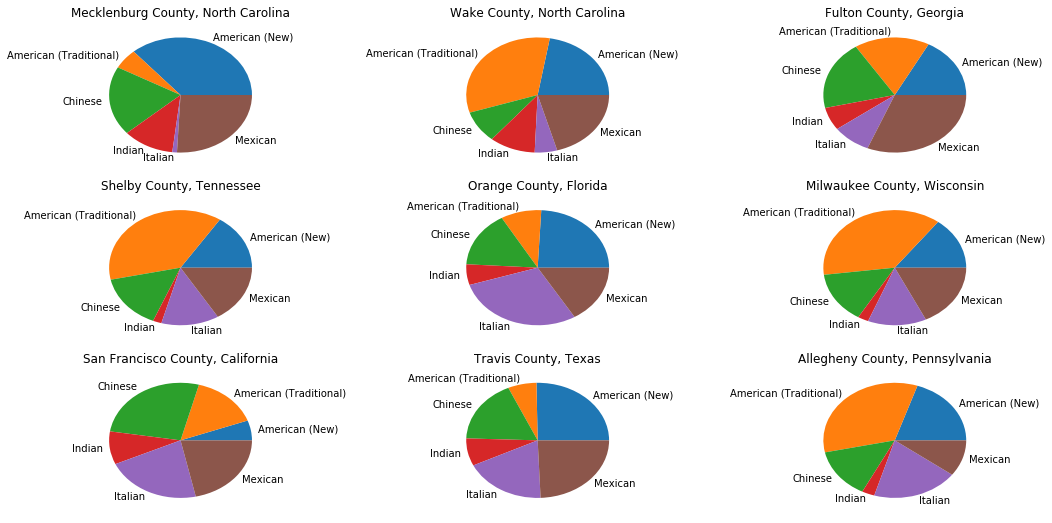

In [313]:
fig, axes = plt.subplots(3,3,figsize= (16,9))
for i, (idx, row) in enumerate(comp_df.set_index("county_string").iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum()*.01)]
    ax.pie(row, labels=row.index)
    ax.set_title(idx)
fig.subplots_adjust(wspace=1)

In [218]:
comp = pd.DataFrame(res_df["category"].groupby(res_df["county_string"]).value_counts())
comp
#I HAVE NO IDEA WHAT TO DO WITH THIS

category
county_string                      category                        
Allegheny County, Pennsylvania     American (Traditional)       339
                                   American (New)               201
                                   Italian                      197
                                   Chinese                      143
                                   Mexican                      103
                                   Indian                        29
Fulton County, Georgia             Mexican                      233
                                   Chinese                      145
                                   American (New)               128
                                   American (Traditional)       127
                                   Italian                       65
                                   Indian                        48
Mecklenburg County, North Carolina American (New)               103
                                   Mexican                       73
                                   Chinese                       55
                                   Indian                        33
                                   American (Traditional)        16
                                   Italian                        3
Milwaukee County, Wisconsin        American (Traditional)       245
                                   Mexican                      117
                                   American (New)                96
                                   Chinese                       95
                                   Italian                       87
                                   Indian                        16
Orange County, Florida             Italian                      169
                                   American (New)               142
                                   Mexican                       96
                                   Chinese                       92
                                   American (Traditional)        54
                                   Indian                        34
San Francisco County, California   Chinese                      262
                                   Italian                      213
                                   Mexican                      212
                                   American (Traditional)       150
                                   Indian                        91
                                   American (New)                55
Shelby County, Tennessee           American (Traditional)       213
                                   Mexican                       92
                                   American (New)                89
                                   Chinese                       87
                                   Italian                       74
                                   Indian                        11
Travis County, Texas               American (New)               164
                                   Mexican                      158
                                   Italian                      120
                                   Chinese                      115
                                   Indian                        50
                                   American (Traditional)        42
Wake County, North Carolina        American (Traditional)       135
                                   American (New)                92
                                   Mexican                       85
                                   Indian                        43
                                   Chinese                       37
                                   Italian                       21

In [150]:
CHA = CHA["category"].value_counts().reset_index()
CHA["county_string"]="Mecklenburg County, North Carolina"
CHA.columns = ["category","count","county_string"]
CHA

,category,count,county_string
0,American (New),103,"Mecklenburg County, North Carolina"
1,Mexican,73,"Mecklenburg County, North Carolina"
2,Chinese,55,"Mecklenburg County, North Carolina"
3,Indian,33,"Mecklenburg County, North Carolina"
4,American (Traditional),16,"Mecklenburg County, North Carolina"
5,Italian,3,"Mecklenburg County, North Carolina"
